In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io

## Import Data And Save The Values

In [2]:
field_data = io.loadmat('../MATLAB Workspaces and Scripts/Workspaces/ExportedData_MaxMod.mat')
grad_data = io.loadmat('../MATLAB Workspaces and Scripts/Workspaces/ExportedDataSamMaxModGrad.mat')

# Same grid, so smae points
x_axis = field_data['Axis0'][0]
y_axis = field_data['Axis1'][0]
z_axis = field_data['Axis2'][0]

# Get the EM field data and the gradient of it
em_field = np.reshape(field_data['Snapshot0'], (-1, (x_axis.size - 1)))
em_field_grad = grad_data['Snapshot0']

In [3]:
def plot_field_along_axis(geometry_points : np.ndarray, em_field, x_slice=None, y_slice=None, z_slice=None, dB=False):
    x_axis = np.unique(geometry_points.T[0])*1000.0
    y_axis = np.unique(geometry_points.T[1])*1000.0
    z_axis = np.unique(geometry_points.T[2])*1000.0
    
    title = ''
    if x_slice is None:
        # X axis
        distance = x_axis
        values = em_field[y_slice + y_axis.size*(z_slice - 1)]
        title = 'X axis'
    elif y_slice is None:
        # Y axis
        distance = y_axis
        values = em_field.T.reshape(-1, y_axis.size)[z_slice + z_axis.size*(x_slice - 1)]
        title = 'Y axis'
    elif z_slice is None:
        # Z axis
        distance = z_axis
        values = em_field.T.reshape(-1, y_axis.size).T.reshape(-1, z_axis.size)[x_slice + x_axis.size*(y_slice - 1)]
        title = 'Z axis'
    
    if x_slice and y_slice and z_slice is not None:
        fig = plt.figure(figsize=(18, 5))
        
        # Create subplots
        ax_x = fig.add_subplot(1, 3, 1)
        ax_y = fig.add_subplot(1, 3, 2)
        ax_z = fig.add_subplot(1, 3, 3)
        
        # Add the plots
        x = em_field[y_slice + y_axis.size*(z_slice - 1)]
        y = em_field.T.reshape(-1, y_axis.size)[z_slice + z_axis.size*(x_slice - 1)]
        z = em_field.T.reshape(-1, y_axis.size).T.reshape(-1, z_axis.size)[x_slice + x_axis.size*(y_slice - 1)]
        
        if dB:
            ax_x.set_ylabel('EM Field [dB(' + str(round(np.amax(x), 2)) + ' V/m)])')
            ax_y.set_ylabel('EM Field [dB(' + str(round(np.amax(y), 2)) + ' V/m)])')            
            ax_z.set_ylabel('EM Field [dB(' + str(round(np.amax(z), 2)) + ' V/m)])')
            x = 20.0*np.log10(x/np.amax(x))
            y = 20.0*np.log10(y/np.amax(y))
            z = 20.0*np.log10(z/np.amax(z))

        ax_x.plot(x_axis, x)
        ax_y.plot(y_axis, y)
        ax_z.plot(z_axis, z)
        
        # Set axis labels
        ax_x.set_xlabel('Distance From Center [mm]')
        ax_y.set_xlabel('Distance From Center [mm]')
        ax_z.set_xlabel('Distance From Center [mm]')
        
        # Set titles
        ax_x.set_title('X axis' + ' EM field distribution')
        ax_y.set_title('Y axis' + ' EM field distribution')
        ax_z.set_title('Z axis' + ' EM field distribution')
    else:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(title + ' EM field distribution')
        
        if dB:
            max_val = np.amax(values)
            values = 20.0*np.log10(values/np.amax(values))
            ax.set_ylabel('EM Field [dB(' + str(round(max_val, 2)) + ' V/m)])')
        else:
            ax.set_ylabel('EM Field [V/m]')
        ax.plot(distance, values)
        ax.set_xlabel('Distance From Center [mm]')
    # ax.plot(np.unique(geometry_points.T[0])*1000, 20.0*np.log10(em_field[y_slice + y_axis_length*(z_slice - 1)]/np.amax(em_field[y_slice + y_axis_length*(z_slice - 1)])))
    
    plt.show()

## Arrange The Grid Points
Based on the Sim4Life's guide the grid points are calculated as:

In [4]:
x_avg = 0.5*np.add(x_axis[:-1], x_axis[1:])
y_avg = 0.5*np.add(y_axis[:-1], y_axis[1:])
z_avg = 0.5*np.add(z_axis[:-1], z_axis[1:])

geometry_points = np.array(np.meshgrid(x_avg, y_avg, z_avg, indexing='ij')).T.reshape(-1, 3)

In [5]:
x = np.unique(geometry_points.T[0])
y = np.unique(geometry_points.T[1])

dx = np.min(np.diff(x))
dy = np.amin(np.diff(y))

nx = int(np.ceil(1 + (x[-1] - x[1])/dx).item())
xe = np.linspace(x[1], x[-1], nx)

ny = int(np.ceil(1 + (y[-1] - y[1])/dy).item())
ye = np.linspace(y[1], y[-1], ny)
print(xe.shape)
a = (68-1)*(98)
b = 68*(98)
c = 20.0*np.log10(em_field[a:b])
print(c.T.shape)
ce = np.zeros((ny, nx))

for i in range(0, nx):
    for j in range(0, ny):
        indi = np.where(x <= xe[i])
        indj = np.where(y <= ye[j])
        #print(indj[0])
        ce[j][i] = c[indj[0][-1]][indi[0][-1]]
print(ce.shape)

(453,)
(76, 98)


c:\users\dimitris\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(495, 453)


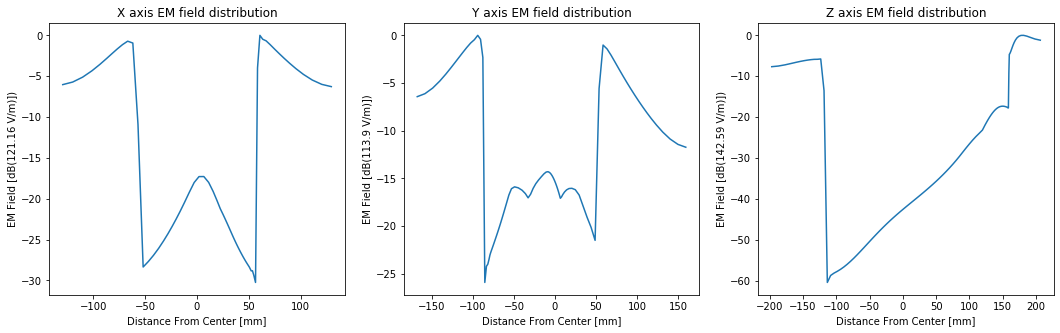

In [6]:
a = (68-1)*(98)
b = 68*(98)
plot_field_along_axis(geometry_points, em_field, y_slice=45, x_slice=25, z_slice=68, dB=True)

#plt.imshow(ce, interpolation="bicubic", aspect='auto')

#ty = em_field.T.reshape(-1, 98)[47*105:48*105]
#plt.imshow(ty, interpolation="bicubic", aspect='auto')

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.contour(np.unique(geometry_points.T[0]), np.unique(geometry_points.T[1]), em_field[a:b])
#plt.show()